# Принятие решений в бизнесе. Интернет-магазин.

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных**  

Данные для первой части  
Файл /datasets/hypothesis.csv.  
* Hypothesis — краткое описание гипотезы;  
* Reach — охват пользователей по 10-балльной шкале;  
* Impact — влияние на пользователей по 10-балльной шкале;  
* Confidence — уверенность в гипотезе по 10-балльной шкале;  
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.   

Данные для второй части  
Файл /datasets/orders.csv.  
* transactionId — идентификатор заказа;  
* visitorId — идентификатор пользователя, совершившего заказ;  
* date — дата, когда был совершён заказ;  
* revenue — выручка заказа;  
* group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.  
* date — дата;  
* group — группа A/B-теста;  
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста 

## Цели проекта

**Часть 1. Приоритизация гипотез.**  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  

**Часть 2. Анализ A/B-теста**  
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  

Проанализируйте A/B-тест:  
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.  
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.  
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  
* Примите решение по результатам теста и объясните его. Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.  

## Импорт данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv').copy()
    orders = pd.read_csv('/datasets/orders.csv').copy()
    visitors = pd.read_csv('/datasets/visitors.csv').copy()
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv').copy()
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv').copy()
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv').copy()    

## Приоритизация гипотез.

**Зачем и как рассчитываются гипотезы.**

* гипотезы помогают проверить, являются ли определённые идеи или предположения обоснованными на основе данных.  
* на основе результатов тестирования принимаются решения в бизнесе.  
* гипотезы могут помочь определить, какие изменения или стратегии наиболее эффективны.  


1. первым этапом формируется нулевая гипотеза (H₀) — предположение о том, что нет разницы, и альтернативная гипотеза (H₁) — предположение о наличии разницы.  
2. далее собираются данные, которые будут использоваться для проверки гипотез.  
3. потом данные анализируются, чтобы определить, поддерживают ли они нулевую или альтернативную гипотезу.  
4. после этого результаты анализа оцениваются на основе уровня значимости (обычно 0.05). Если p-value меньше уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной.
5. завершающим этапом делается вывод о поддержке или отказе от нулевой гипотезы. Тут может быть принято решение о внедрении новой стратегии в бизнес или решение о продолжении теста.  

**Применим фреймворк ICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.**

In [3]:
pd.options.display.max_colwidth = 400
hypothesis['ice'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 3)
hypothesis.sort_values(by='ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [4]:
pd.options.display.max_colwidth = 400
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


**Выводы:**

* Согласно ICE самые перспективные гипотезы под номерами 8, 0 и 7.  
* Согласно RICE самые перспективные гипотезы под номерами 7, 2 и 0.  

RICE учитывает охват гипотезы, поэтому будем ориентироваться на него. Гипотезы следующие:  
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей





## Анализ A/B-теста

**Изучим данные датасетов.**

**orders**

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [7]:
orders.duplicated().sum()

0

In [8]:
orders['date'] = pd.to_datetime(orders['date']).dt.date

In [9]:
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**visitors**

In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()
visitors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [12]:
visitors.duplicated().sum()

0

In [13]:
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

На данном этапе выяснили:  
* пропуски и дубликаты отсутствуют.  
* по каждому датасету сделали корректный формат времени.  
* у orders переименовали столбцы.

In [14]:
display('заказы', orders['date'].min(), orders['date'].max(),
'пользователи', visitors['date'].min(), visitors['date'].max())

'заказы'

datetime.date(2019, 8, 1)

datetime.date(2019, 8, 31)

'пользователи'

datetime.date(2019, 8, 1)

datetime.date(2019, 8, 31)

In [15]:
display(orders.groupby('group').agg({'transaction_id': 'count'}))
display(visitors.groupby('group').agg({'visitors': 'sum'}))

,transaction_id
group,
A,557
B,640


,visitors
group,
A,18736
B,18916


* период в файлах совпадает.  
* выяснили, что 58 человек попали в обе группы, что незначительно исказит результат.

In [17]:
users_a = orders.query('group == "A"')['visitor_id']
users_b = orders.query('group == "B"')['visitor_id']
orders_ab = orders.query('visitor_id in @users_a and visitor_id in @users_b')
print(orders_ab['visitor_id'].nunique())

58


In [18]:
orders = orders.query('visitor_id not in @orders_ab["visitor_id"]')

In [19]:
orders.groupby('group')['visitor_id'].count()

group
A    468
B    548
Name: visitor_id, dtype: int64

## Кумулятивные показатели

**Подготовка данных.**

In [20]:
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [21]:
orders_agg = (dates_groups.apply(lambda x:
    orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
    .agg({'date' : 'max','group' : 'max','transaction_id' : pd.Series.nunique,'visitor_id' : pd.Series.nunique,
     'revenue' : 'sum'}), axis=1)
                .sort_values(by=['date','group']))
orders_agg.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [22]:
visitors_agg = (dates_groups.apply(lambda x:
    visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                        .sort_values(by=['date','group']))
visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
c_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
c_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
c_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [24]:
c_rev_a = c_data[c_data['group']=='A'][['date','revenue', 'orders']]
c_rev_b = c_data[c_data['group']=='B'][['date','revenue', 'orders']]

1. создадали таблицу с уникальными значениями даты и группы, удалили дубликаты.  
2. создадали таблицу, где есть:
   * дата
   * группа 
   * количество уникальных заказов
   * количество уникальных пользователей, совершивших заказ
   * суммарная выручка
3. создадили таблицу, где есть:  
   * дата
   * группа
   * количество уникальных посетителей
4. объеденили таблицы orders_agg и visitors_agg, тем самым создали общую кумулятивную таблицу.  
5. разделили общую таблицу по группам.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

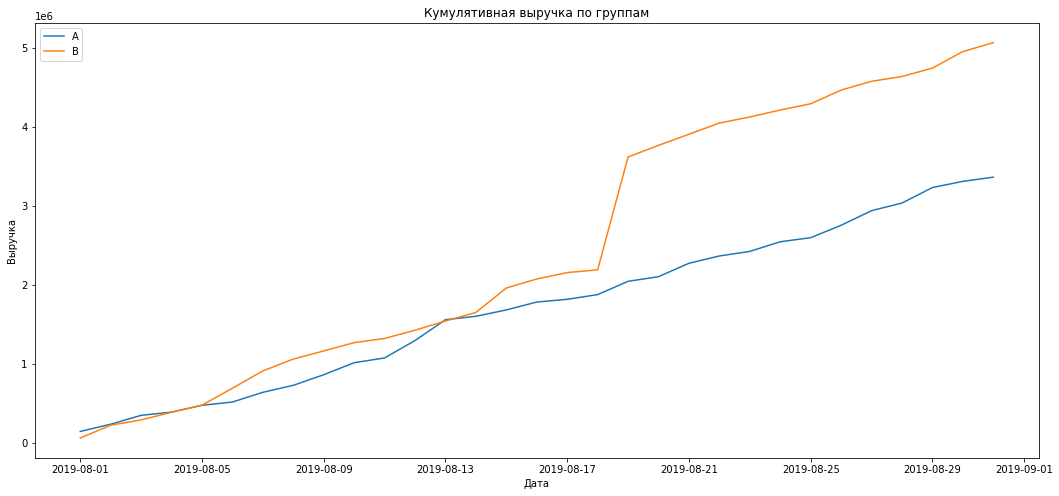

In [25]:
plt.figure(figsize=(18,8))
plt.plot(c_rev_a['date'], c_rev_a['revenue'], label='A')
plt.plot(c_rev_b['date'], c_rev_b['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend()
plt.show()

Группа В стала больше расти на 5 день и показала аномально резкий скачок на третьей неделе теста. Это может быть связано с увеличением количества крупных заказов. В связи с этим на данном этапе нельзя сделать вывод.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

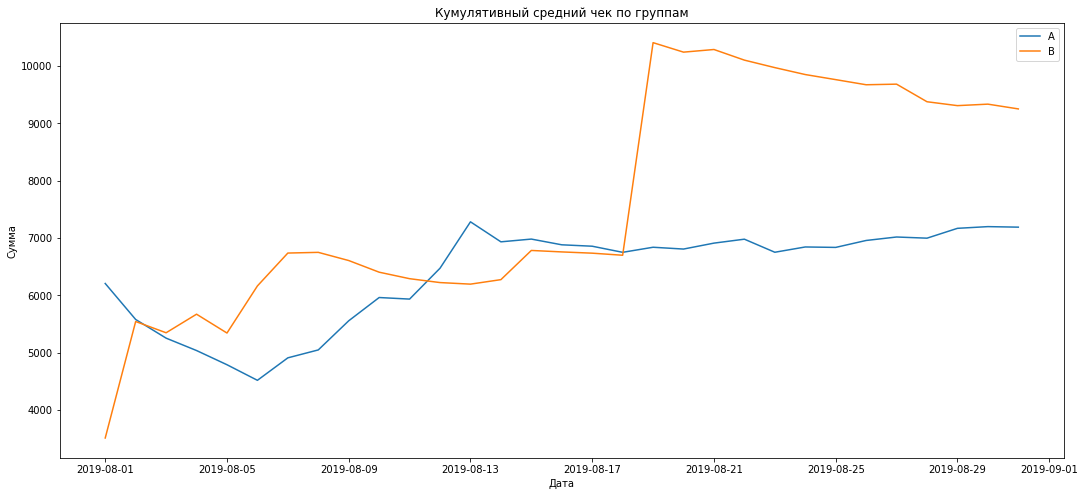

In [26]:
plt.figure(figsize=(18,8))
plt.plot(c_rev_a['date'], c_rev_a['revenue'] / c_rev_a['orders'], label='A')
plt.plot(c_rev_b['date'], c_rev_b['revenue'] / c_rev_b['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Сумма")
plt.legend()
plt.show()

На основании этого графика можно предполодить, что теория верна. У группы В резко вырос средний чек.  
В то время, как у группы А он примерно на одном уровне с середины месяца.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

In [27]:
merged_c_rev = (c_rev_a.merge(c_rev_b,left_on='date', right_on='date', how='left', suffixes=['_a', '_b']))
merged_c_rev.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Создали таблицу кумулятивных данных групп.

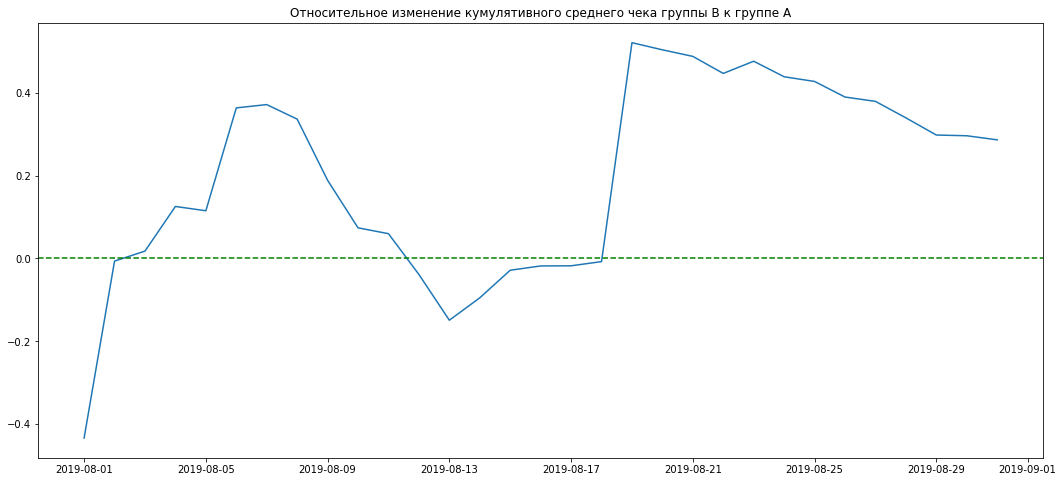

In [28]:
plt.figure(figsize=(18,8))
plt.plot(merged_c_rev['date'],
         (merged_c_rev['revenue_b'] / merged_c_rev['orders_b']) / 
         (merged_c_rev['revenue_a'] / merged_c_rev['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='green', linestyle='--')
plt.show()

Относительное изменение кумулятивного среднего чека группы В схоже с графиком кумулятивного среднего чека.


### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения

In [29]:
c_data['conversion'] = c_data['orders'] / c_data['visitors']
c_data_a = c_data[c_data['group']=='A']
c_data_b = c_data[c_data['group']=='B']

c_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Добавили столбец с конверсией к кумулятивной таблице и создали две таблицы с разделением по группам.

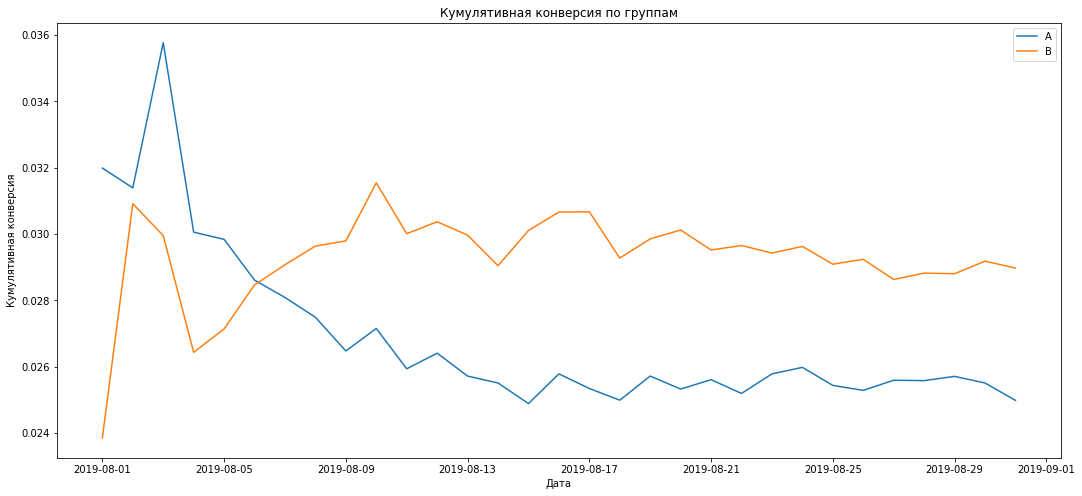

In [30]:
plt.figure(figsize=(18,8))
plt.plot(c_data_a['date'], c_data_a['conversion'], label='A');
plt.plot(c_data_b['date'], c_data_b['conversion'], label='B');
plt.title('Кумулятивная конверсия по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивная конверсия")
plt.legend()
plt.show()

В начале месяца конверсия группы А была изначально выше группы В, но на шестой день конверсия группы B стала выше группы А.  
Спустя две недели конверсии обоих групп начали стабилизироваться.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения

In [31]:
mer_c_conversions = (c_data_a[['date','conversion']]
                                     .merge(c_data_b[['date','conversion']],
                                            left_on='date', right_on='date',
                                            how='left', suffixes=['_a', '_b']))
mer_c_conversions.head() 

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Создали таблицу кумулятивной конверсии.

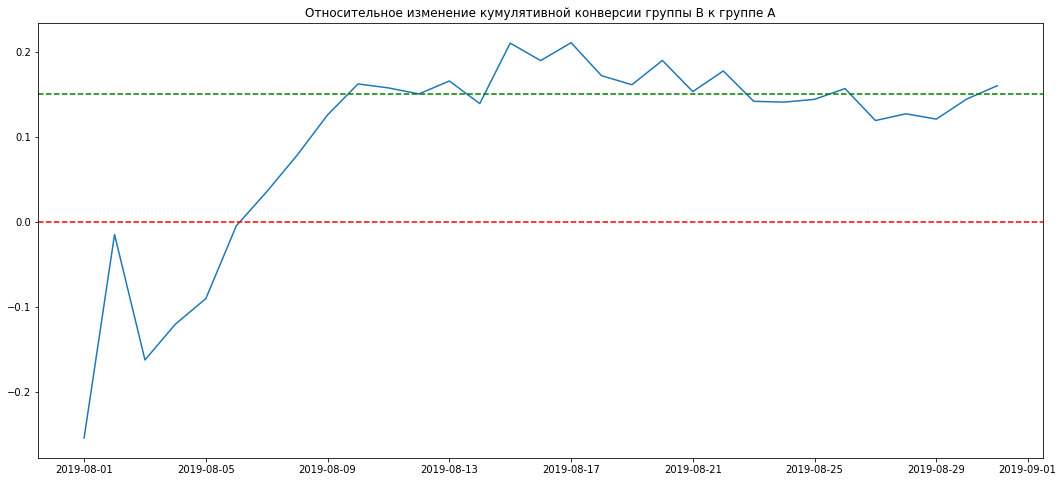

In [32]:
plt.figure(figsize=(18,8))
plt.plot(mer_c_conversions['date'],
         mer_c_conversions['conversion_b'] / mer_c_conversions['conversion_a']-1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.15, color='green', linestyle='--')
plt.show()

На 6 день начался рост конверсии группы В. И на 10 день стабилизировалась на уровне 15% выше группы А.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [33]:
orders_per_u = (orders.drop(['group', 'revenue', 'date'], axis=1)
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id' : pd.Series.nunique}))
orders_per_u.columns = ['visitor_id','orders']
orders_per_u.sort_values(by='orders', ascending=False).head()

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Создали таблицу с количеством заказов каждого пользователя.

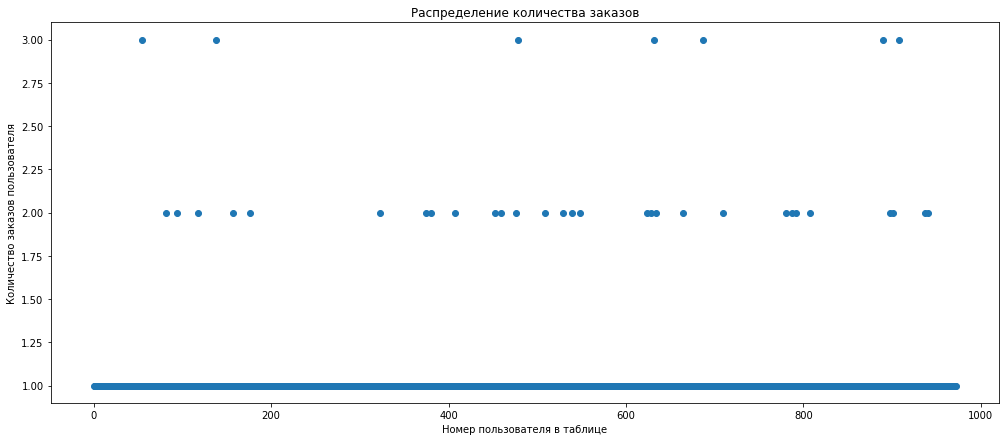

In [34]:
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders_per_u['orders']))), orders_per_u['orders'])
plt.title('Распределение количества заказов')
plt.ylabel('Количество заказов пользователя')
plt.xlabel('Номер пользователя в таблице')
plt.show()

Как правило, пользователи ограничиваются одним заказом, максимум двумя. Небольшое количество пользователей совершают от 3 до 11 заказов.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [35]:
display(np.percentile(orders_per_u['orders'], [95, 99]))

array([1., 2.])

Делаем вывод, что из всех пользоваетелй только 5% делает больше 2 заказов, и 1% делает больше 4 заказов. Тех, кто делает больше 3 заказов, считаем аномальными.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

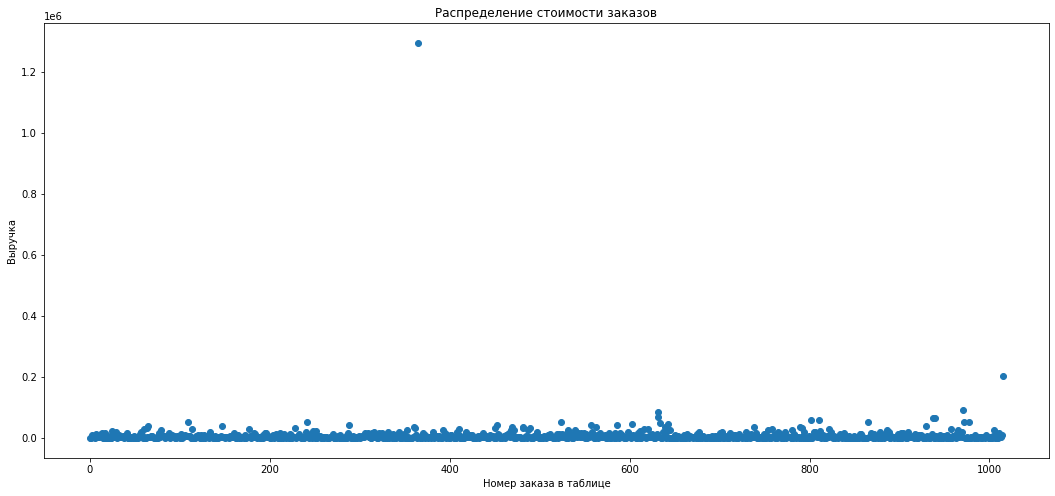

In [36]:
plt.figure(figsize=(18,8))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylabel('Выручка')
plt.xlabel('Номер заказа в таблице')
plt.show()

Посмотрим так же заказы до 220 тысяч.

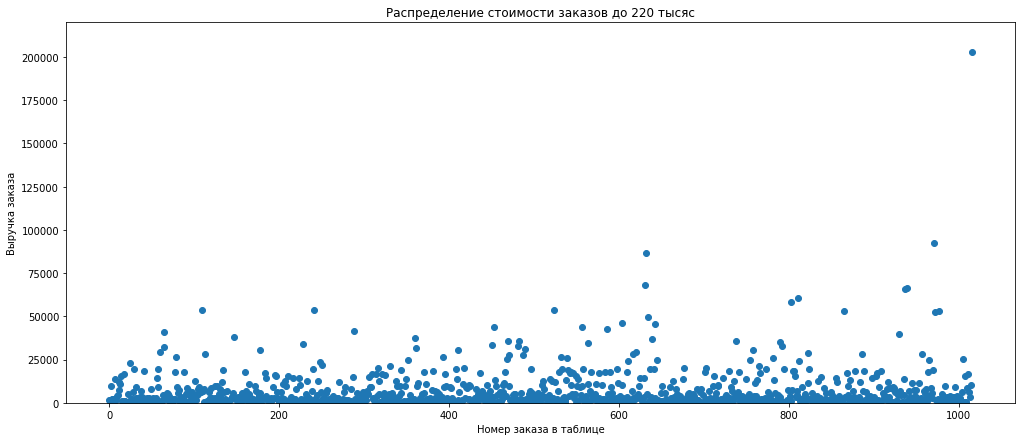

In [37]:
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов до 220 тысяс')
plt.ylabel('Выручка заказа')
plt.xlabel('Номер заказа в таблице')
plt.ylim(0,220000)
plt.show()

Как правило, сумма заказа до 25 тысяч. Немного реже заказы делают на сумму до 60 тысяч. Еденичные случаи заказов от 60 тысяч до 1.2 миллиона.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Делаем вывод, что из всех заказов только 5% на сумму 28 тысяч, и 1% свыше 58 тысяч. Тех, кто делает заказ на сумму свыше 28 тысяч, считаем аномальными.

### Подготовим "сырые" данные для изучения статистической значимости

In [39]:
vis_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]
vis_daily_A.columns = ['date', 'vis_per_date_A']

vis_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]
vis_daily_B.columns = ['date', 'vis_per_date_B']


vis_cummulative_A = vis_daily_A.apply(lambda x: 
                        vis_daily_A[vis_daily_A['date'] <= x['date']].agg({
                        'date' : 'max', 'vis_per_date_A' : 'sum'}), axis=1)
vis_cummulative_A.columns = ['date', 'vis_cummulative_A']

vis_cummulative_B = vis_daily_B.apply(lambda x: 
                        vis_daily_B[vis_daily_B['date'] <= x['date']].agg({
                        'date' : 'max', 'vis_per_date_B' : 'sum'}), axis=1)
vis_cummulative_B.columns = ['date', 'vis_cummulative_B']

Создали таблицы ежедневного количества пользователей по группам и с кумулятивным количеством пользователей к дате по группам.

In [40]:
or_daily_A = orders[orders['group']=='A'][['date', 'transaction_id','visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
or_daily_A.columns = ['date', 'or_per_date_A', 'rev_per_date_A']

or_daily_B = orders[orders['group']=='B'][['date', 'transaction_id','visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
or_daily_B.columns = ['date', 'or_per_date_B', 'rev_per_date_B']


or_cummulative_A = or_daily_A.apply(lambda x: or_daily_A[or_daily_A['date'] <= x['date']].agg({
                'date' : 'max',
                'or_per_date_A' : 'sum',
                'rev_per_date_A' : 'sum'}), axis=1).sort_values(by=['date'])
or_cummulative_A.columns = ['date', 'or_сummulative_A', 'rev_сummulative_A']

or_cummulative_B = or_daily_B.apply(lambda x: or_daily_B[or_daily_B['date'] <= x['date']].agg({
                'date' : 'max',
                'or_per_date_B' : 'sum',
                'rev_per_date_B' : 'sum'}), axis=1).sort_values(by=['date'])
or_cummulative_B.columns = ['date', 'or_сummulative_B', 'rev_сummulative_B']

Создали таблицы с количеством заказов и размером выручки по группам и с кумулятивным количеством заказов и выручки.

In [41]:
data = (vis_daily_A
        .merge(vis_daily_B, left_on='date', right_on='date', how='left')
        .merge(vis_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(vis_cummulative_B, left_on='date', right_on='date', how='left')
        .merge(or_daily_A, left_on='date', right_on='date', how='left')
        .merge(or_daily_B, left_on='date', right_on='date', how='left')
        .merge(or_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(or_cummulative_B, left_on='date', right_on='date', how='left'))

Объеденили все таблицы.

In [42]:
or_by_vis_A = orders[orders['group']=='A'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

or_by_vis_A.columns = ['visitor_id', 'orders']

or_by_vis_B = orders[orders['group']=='B'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

or_by_vis_B.columns = ['visitor_id', 'orders']

sample_A = pd.concat([or_by_vis_A['orders'],
                     pd.Series(0, index=np.arange(
                     data['vis_per_date_A'].sum() -
                     len(or_by_vis_A['orders'])),
                     name='orders')],axis=0)

sample_B = pd.concat([or_by_vis_B['orders'],
                     pd.Series(0, index=np.arange(
                     data['vis_per_date_B'].sum() -
                     len(or_by_vis_B['orders'])), 
                     name='orders')],axis=0)

Создали таблицы для каждой группы с количеством заказов по пользователям.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения

Проверка будет с помощью непараметрического критерия Манна-Уитни.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия в конверсии между группами есть.

Уровень статистической значимости alpha = 0.05.

In [43]:
print('p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A, sample_B)[1]))

if st.mannwhitneyu(sample_A, sample_B)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост конверсии группы B: {:.2%}'.format((sample_B.mean()/sample_A.mean()) - 1))

p-value для конверсий: 0.011
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 15.98%


Нулевую гипотезу - отвергаем. Различая в конверсии есть, относительный прирост конверсии группы В составляет 13.81%. Но в этих выборках есть выбросы.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

Проверка будет с помощью непараметрического критерия Манна-Уитни.  Так же посчитаем относительный прирост среднего чека в группе В.

Нулевая гипотеза: различий в среднем чеке групп нет.  
Альтернативная гипотеза: различия в среднем чеке есть.

Уровень статистической значимости alpha = 0.05.

In [44]:
pvalue_mean_ch = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]

print('p-value для среднего чека: {:.3f}'.format(pvalue_mean_ch))

if pvalue_mean_ch < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B: {:.2%}'
    .format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()) - 1))

p-value для среднего чека: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 28.66%


Нулевую гипотезу - не отвергаем.  
Но можем предположить влияние аномальных заказов на прирост среднего чека в группе В, который составляет 25.87%.

### Подготовка очищенных данных для изучения статистической значимости

In [45]:
vis_orders = pd.concat([or_by_vis_A.query('orders > 2')['visitor_id'], 
                        or_by_vis_B.query('orders > 2')['visitor_id']], axis = 0)
vis_orders_e = orders.query('revenue > 28000')['visitor_id']


a_visitors = (pd.concat([vis_orders, vis_orders_e], axis = 0).drop_duplicates().sort_values())

print('Количество аномальных пользователей:',len(a_visitors))
print('Доля аномальных пользователей {:.2%}'.format(len(a_visitors) / len(orders['visitor_id'].unique())))

Количество аномальных пользователей: 55
Доля аномальных пользователей 5.65%


Ранее выяснили, что пользователи, которые сделали более 2 заказов на сумму свыше 26 тысяч рублей, считаем аномальными. Их доля составляет 5.65%. Исключив их, сможем более точно изучить данные.  

Cоздадим таблицы по пользователям для каждой группы без аномальных пользователей с количеством заказов.

In [46]:
sample_A_filter = pd.concat([or_by_vis_A[np.logical_not(or_by_vis_A['visitor_id']
                            .isin(a_visitors))]['orders'],
                            pd.Series(0, index=np.arange(data['vis_per_date_A'].sum() - 
                            len(or_by_vis_A['orders'])),
                            name='orders')],
                            axis=0)

sample_B_filter = pd.concat([or_by_vis_B[np.logical_not(or_by_vis_B['visitor_id']
                           .isin(a_visitors))]['orders'],
                           pd.Series(0, index=np.arange(data['vis_per_date_B'].sum() - 
                           len(or_by_vis_B['orders'])),
                           name='orders')],
                           axis=0)

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения

Проверка будет с помощью непараметрического критерия Манна-Уитни. Так же узнаем относительный прирост конверсии группы B по очищенным данным.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия в конверсии между группами есть.

Уровень статистической значимости alpha = 0.05

In [47]:
print('p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A_filter, sample_B_filter)[1]))

if st.mannwhitneyu(sample_A_filter, sample_B_filter)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост конверсии группы B: {:.2%}'.format((sample_B_filter.mean() / sample_A_filter.mean()) - 1))

p-value для конверсий: 0.009
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 18.86%


После очистки данных результат тот же - различия между группами есть.  
Прирост конверсии группы В составляет 17.27%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Проверка будет с помощью непараметрического критерия Манна-Уитни. Так же посчитаем относительный прирост среднего чека в группе В по очищенным данным.

Нулевая гипотеза: различий в среднем чеке групп нет.  
Альтернативная гипотеза: различия в среднем чеке есть.

Уровень статистической значимости alpha = 0.05

In [48]:
filter_pvalue_mean_ch = st.mannwhitneyu(
 orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitor_id'].isin(a_visitors)))]['revenue'],
 orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitor_id'].isin(a_visitors)))]['revenue'])[1]

print('p-value для среднего чека: {:.3f}'.format(filter_pvalue_mean_ch))

if filter_pvalue_mean_ch < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B: {:.2%}'.format(
 (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(a_visitors)))]['revenue'].mean()/
 orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(a_visitors)))]['revenue']
 .mean()) - 1))

p-value для среднего чека: 0.762
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -2.24%


После очистки данных результат тот же - нулевую гипотезу отвергнуть не можем. 
Относительный прирост среднего чека группы В после очистки данных изменился до -2.24%. Возможно потому что у группы В заказов больше, чем у группы А. Не смотря на это, статистически значимых различий в среднем чеке между группами нет.

## Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест. 

В ходе проведенной работы выяснили:  
* большая доля пользователей делает только один заказ в месяц. Более одного заказа совершает 5% пользователей. И 1% более 2 заказов.  
* заказы на сумму свыше 26 тысяч рублей делают 5% пользователей. На сумму свыше 53 тысяч рублей делает только 1% пользователей.  

Мы использовали фреймворк RICE, так как ICE не учитывает охват изменений. Таким образом выяснили, что наиболее перспективной является гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".  
А так же:  
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


А/В тест:  
* 58 пользователей попали в обе группы A/B-теста, что исказило бы результаты. Было принято решение удалить их для более корректного анализа.  
* динамика конверсий обеих групп стабилизировалась в середине месяца. Более высокая конверсия у группы В.  
* кумулятивная выручка у группы В выше, чем у группы А.  

Статистический анализ:  
* и на "сырых" и на очищенных данных статистические значимые различия в конверсии между группами теста есть.
* и на "сырых" и на очищенных данных статистических значимых различий в среднем чеке между группами теста нет.

Таким образом **мы можем останавливать тест и зафиксировать победу группы В**.